In [8]:
from cpgan import init_yaml
import os
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [9]:
f_yaml = init_yaml.yaml_f
f_large = os.path.join(
    f_yaml['img_path']['img_large'],'Berea_2d25um_binary.raw'
    )

raw_file = np.fromfile(f_large, dtype=np.uint8)
im = (raw_file.reshape(1000,1000,1000))
im = im==0

In [10]:
f_yaml = init_yaml.yaml_f['img_path']['img_chunk']
PATH_img = [os.path.join(f_yaml,x) for x  in os.listdir(f_yaml)[:10]]


In [11]:
import numpy as np
from scipy import ndimage
def downscale(img,scale_factor):

    # Define the scaling factors for each dimension
    scale_factors = (scale_factor,scale_factor,scale_factor)

    # Downscale the 3D boolean numpy array
    downscaled_boolean_data = ndimage.zoom(img.astype(float), scale_factors, order=0) > 0.5

    return downscaled_boolean_data

def plot_3D(img): 
    # Generating a 3D sine wave
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')

    # Set black and white colors based on boolean_data
    # colors = np.empty(img.shape + (4,), dtype=np.float32)
    colors = np.empty(img.shape, dtype=object)

    colors[img] = 'white'  # White for True values
    colors[~img] = 'black'  # Black for False values

    plt.axis('off')
    filled = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.bool)

    # Display the boolean_data using voxels
    ax.voxels(filled, facecolors=colors,edgecolors=colors)

    # Show the plot
    plt.show()


/tmp/ipykernel_3210560/2093739129.py:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filled = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.bool)


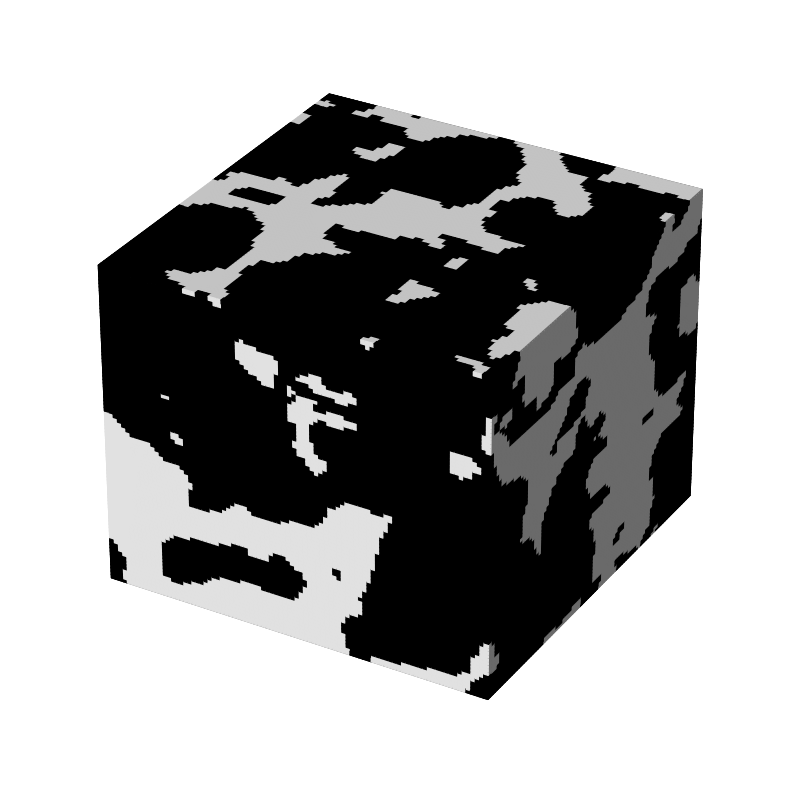

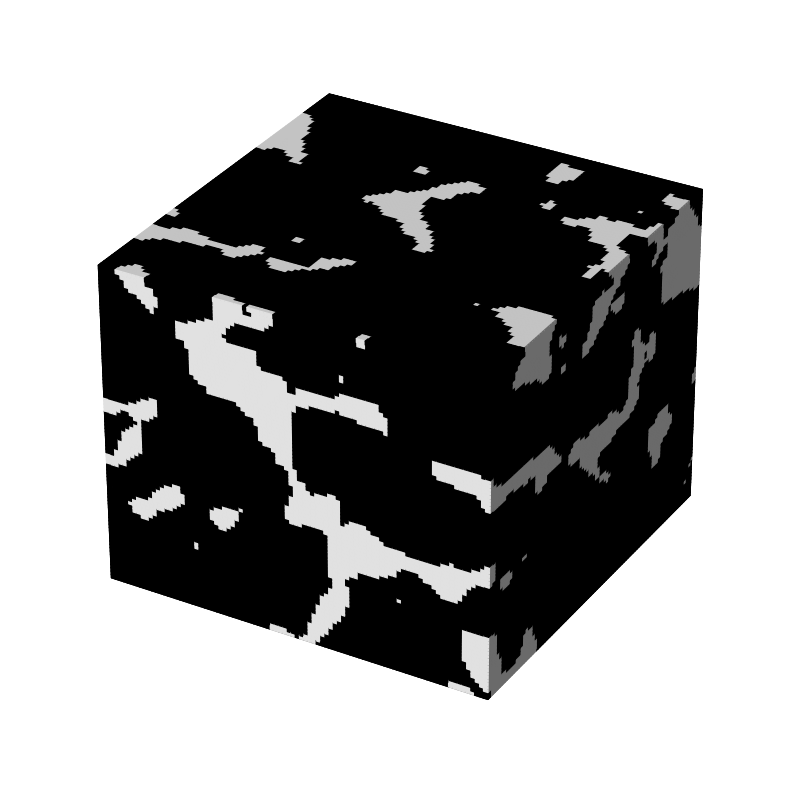

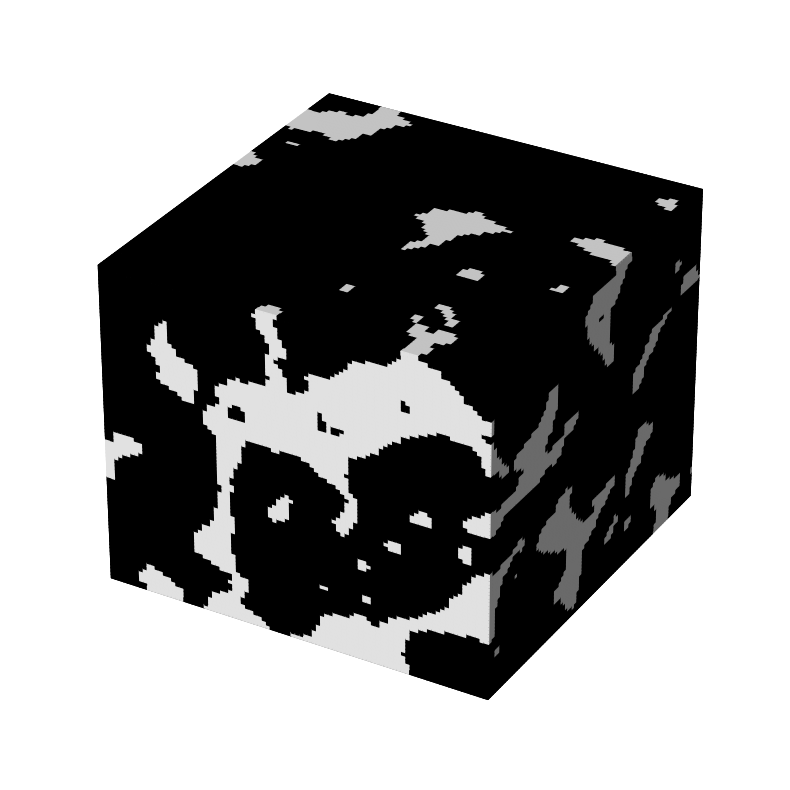

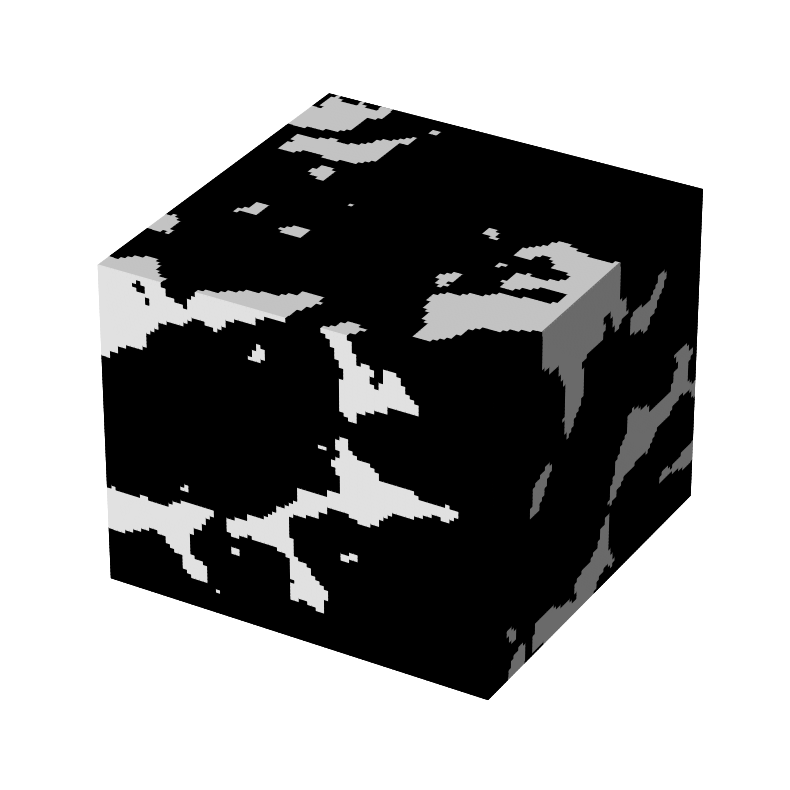

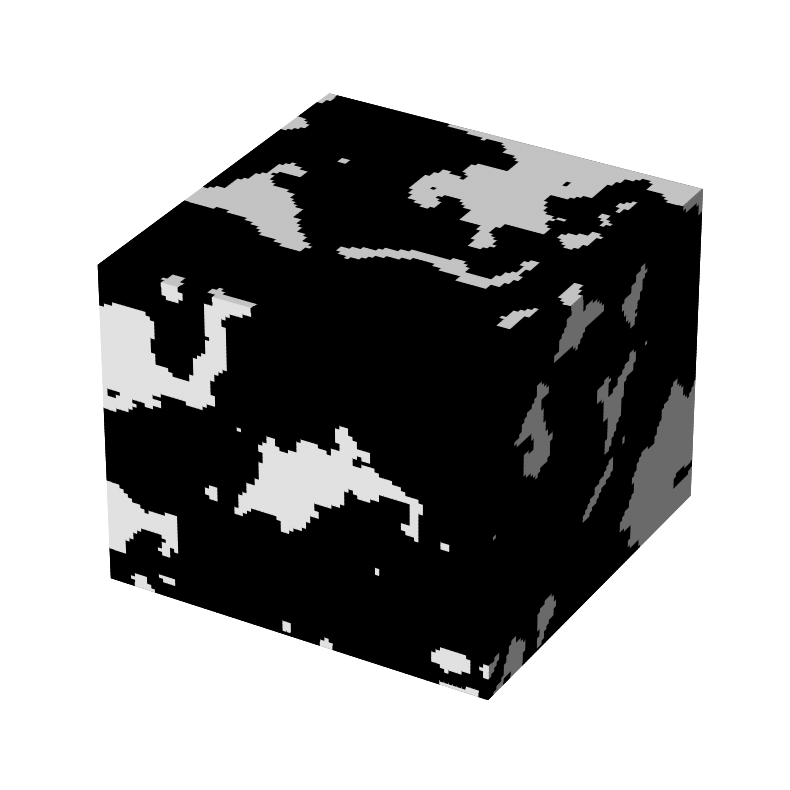

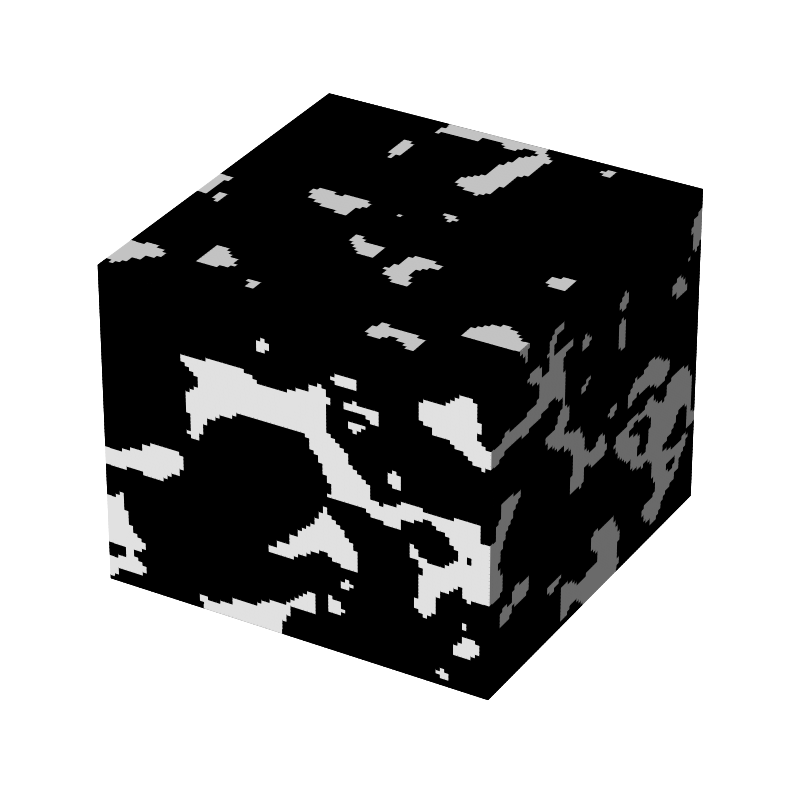

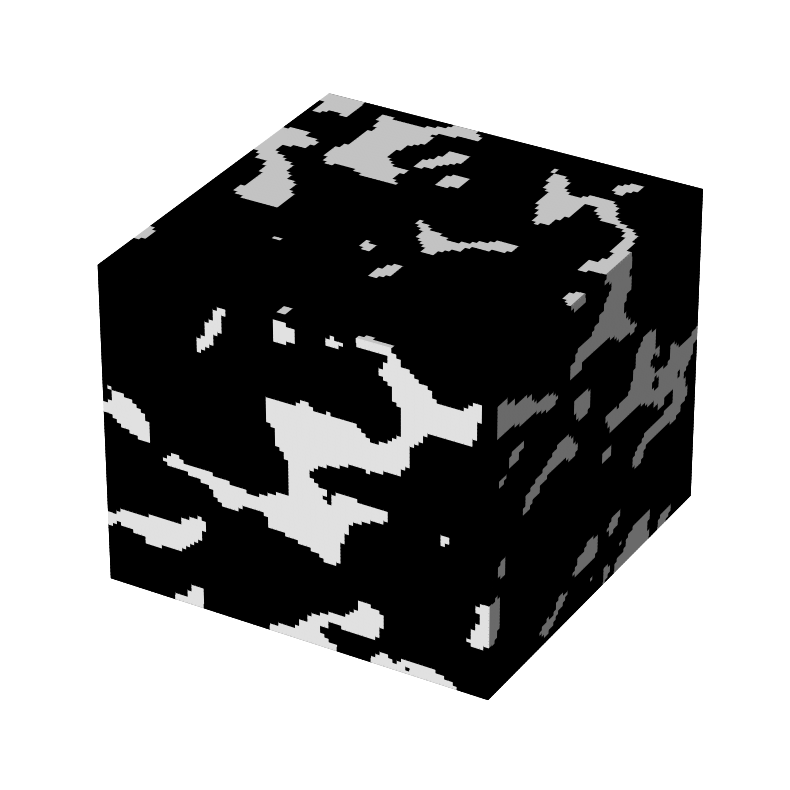

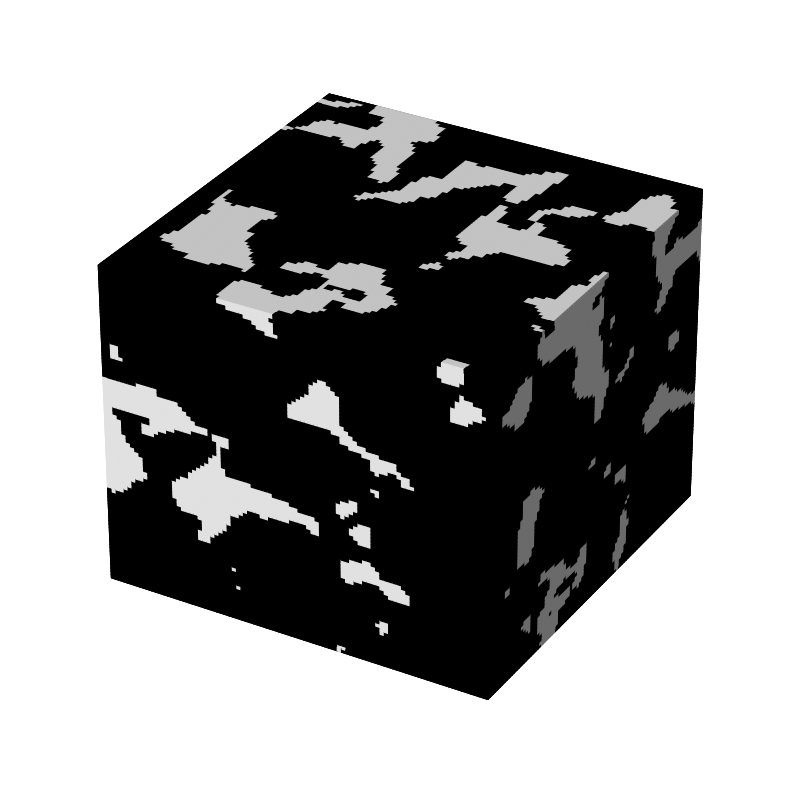

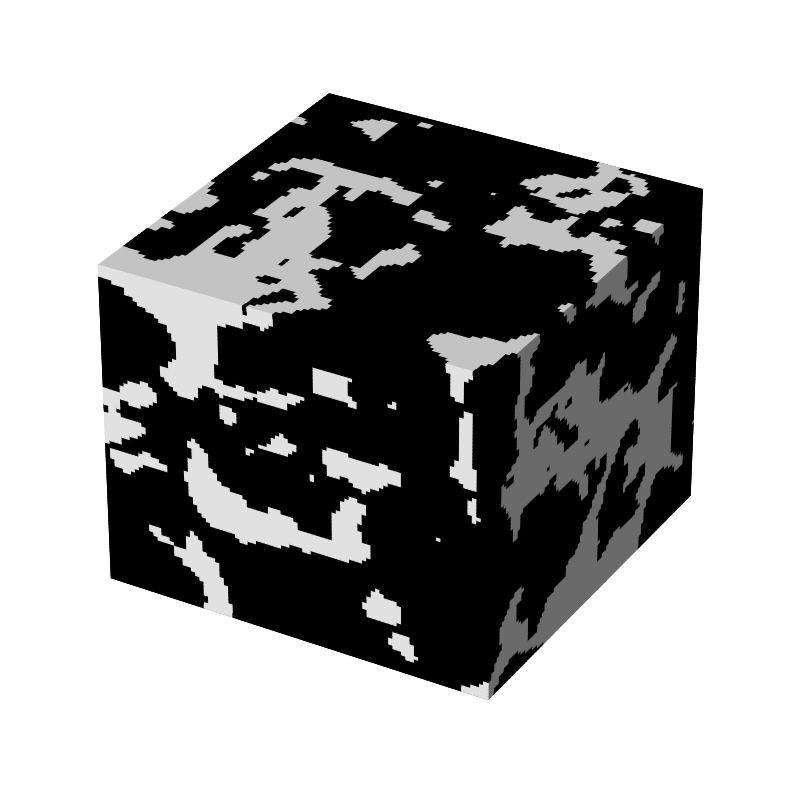

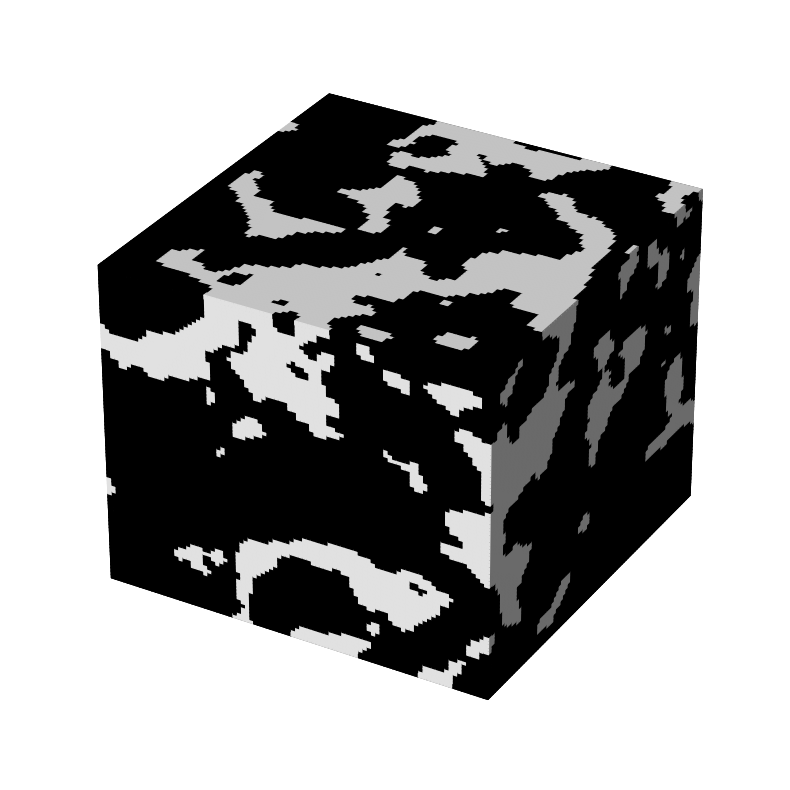

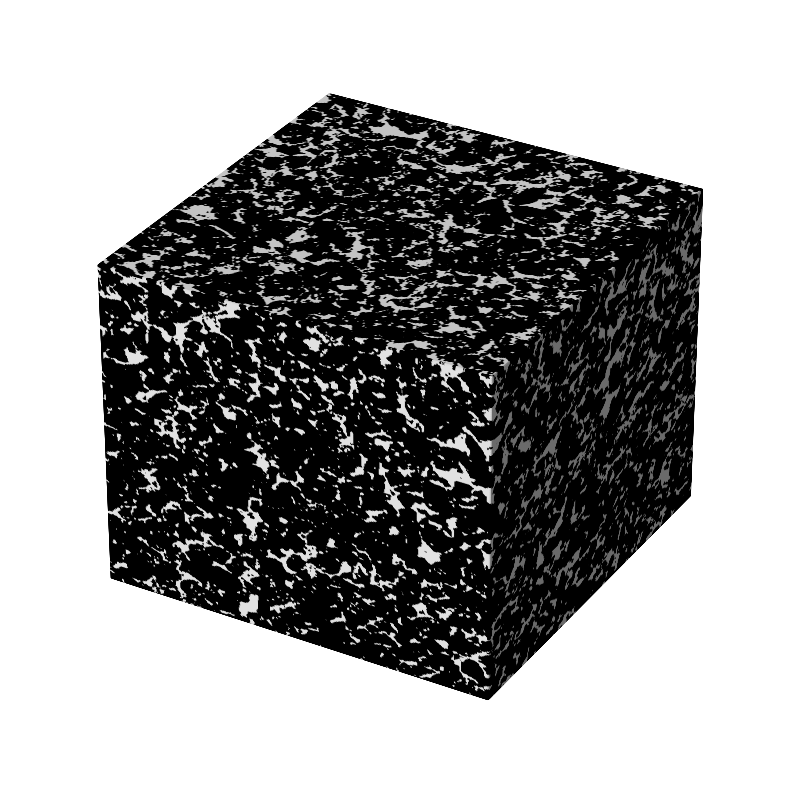

In [5]:
for PATH in PATH_img:
    im_rev = np.load(PATH)
    plot_3D(downscale(im_rev,0.7))
    

plot_3D(downscale(im,0.5))

/tmp/ipykernel_3210560/2093739129.py:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filled = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.bool)


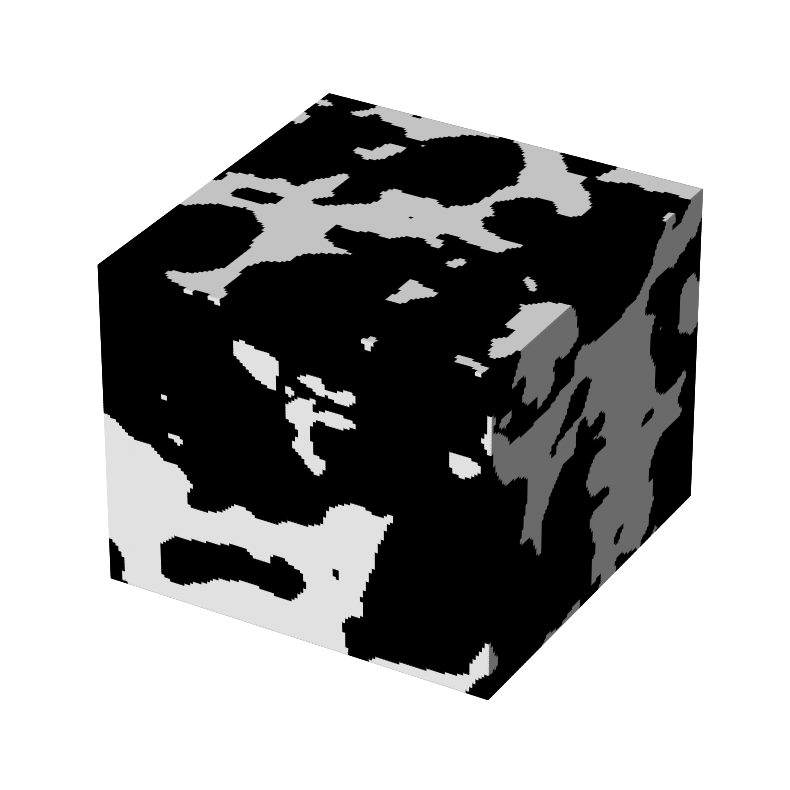

In [13]:
im_rev = np.load(PATH_img[0])
plot_3D(im_rev)